# Configuration


*** IMPORTANT*** 

Remember to enable GPU acceleration! Execution environment -> Change execution environment type -> GPU

In [ ]:
!nvidia-smi

Sat Jan 30 08:18:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras
import numpy as np
from matplotlib import pyplot as plt

# MLP for Computer Vision MNIST

11493376/11490434 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

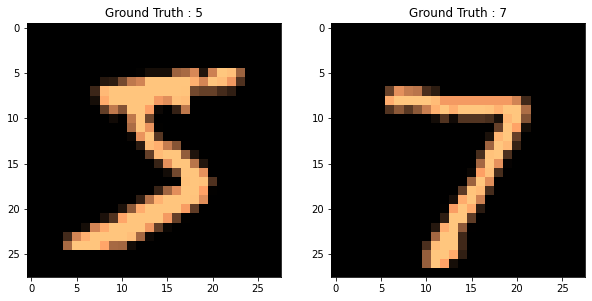

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import to_categorical

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

In [ ]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=10, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 0.4962 - accuracy: 0.8466 - val_loss: 0.1238 - val_accuracy: 0.9601
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.1190 - val_accuracy: 0.9622
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0674 - val_accuracy: 0.9783
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0673 - val_accuracy: 0.9796
Epoch 5/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0952 - val_accuracy: 0.9727
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0751 - val_accuracy: 0.9808
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0805 - val_accuracy: 0.9814

In [ ]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9798
Evaluation result on Test Data : Loss = 0.0945851057767868, accuracy = 0.9797999858856201


In [ ]:
from varname import nameof

def plot_history(history):
  #Plot the Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  #Plot the Accuracy Curves
  plt.figure(figsize=[8,6]) 
  plt.plot(history.history['accuracy'], 'r', linewidth=3.0) 

  plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0) 
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
  plt.xlabel('Epochs ',fontsize=16) 
  plt.ylabel('Accuracy',fontsize=16) 
  plt.title('Accuracy Curves',fontsize=16)

plot_history(history)

ModuleNotFoundError: ignored

# MLP for Computer Vision CIFAR10

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

170500096/170498071 [==============================] - 4s 0us/step
X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


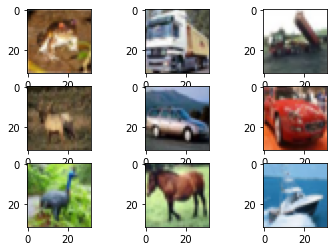

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.utils import to_categorical

print('Training data shape : ', train_x.shape, train_y.shape)

print('Testing data shape : ', test_x.shape, test_y.shape)


# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [ ]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=30, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/30
196/196 [==============================] - 12s 61ms/step - loss: 3.3681 - accuracy: 0.1757 - val_loss: 1.8880 - val_accuracy: 0.3132
Epoch 2/30
196/196 [==============================] - 12s 60ms/step - loss: 1.8962 - accuracy: 0.3174 - val_loss: 1.8396 - val_accuracy: 0.3389
Epoch 3/30
196/196 [==============================] - 12s 60ms/step - loss: 1.7783 - accuracy: 0.3662 - val_loss: 1.7538 - val_accuracy: 0.3642
Epoch 4/30
196/196 [==============================] - 12s 60ms/step - loss: 1.7049 - accuracy: 0.3913 - val_loss: 1.7382 - val_accuracy: 0.3632
Epoch 5/30
196/196 [==============================] - 12s 60ms/step - loss: 1.6397 - accuracy: 0.4139 - val_loss: 1.7707 - val_accuracy: 0.3746
Epoch 6/30
196/196 [==============================] - 11s 58ms/step - loss: 1.5988 - accuracy: 0.4286 - val_loss: 1.6190 - val_accuracy: 0.4232
Epoch 7/30
196/196 [==============================] - 12s 61ms/step - loss: 1.5481 - accuracy: 0.4472 - val_loss: 1.6925 - val_accuracy:

In [ ]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 1.5658 - accuracy: 0.4984
Evaluation result on Test Data : Loss = 1.5658164024353027, accuracy = 0.4984000027179718


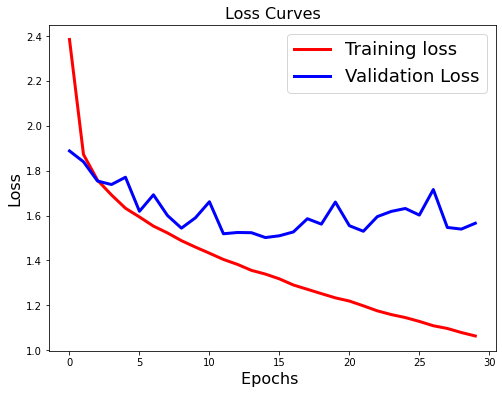

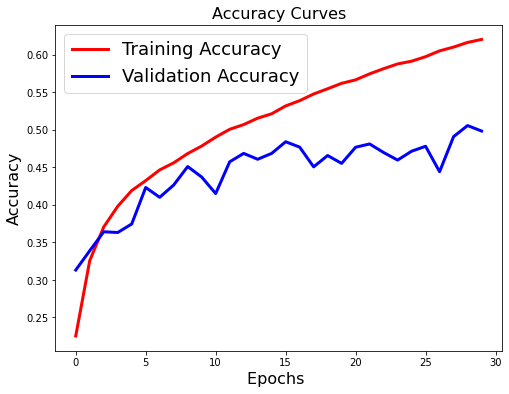

In [ ]:
plot_history(history)

# First CNN for CIFAR10

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 361s 461ms/step - loss: 1.9818 - accuracy: 0.2786 - val_loss: 1.4736 - val_accuracy: 0.4715
Epoch 2/30
782/782 [==============================] - 361s 462ms/step - loss: 1.4733 - accuracy: 0.4733 - val_loss: 1.3652 - val_accuracy: 0.5162
Epoch 3/30
782/782 [==============================] - 362s 463ms/step - loss: 1.2908 - accuracy: 0.5422 - val_loss: 1.1840 - val_accuracy: 0.5806
Epoch 4/30
782/782 [==============================] - 362s 463ms/step - loss: 1.1521 - accuracy: 0.5920 - val_loss: 1.1581 - val_accuracy: 0.5941
Epoch 5/30
782/782 [==============================] - 364s 466ms/step - loss: 1.0422 - accuracy: 0.6378 - val_loss: 1.0242 - val_accuracy: 0.6376
Epoch 6/30
782/782 [==============================] - 361s 461ms/step - loss: 0.9402 - accuracy: 0.6702 - val_loss: 0.9619 - val_accuracy: 0.6615
Epoch 7/30
782/782 [==============================] - 364s 465ms/step - loss: 0.8676 - accuracy: 0.7005 - val_loss: 0.9189 -

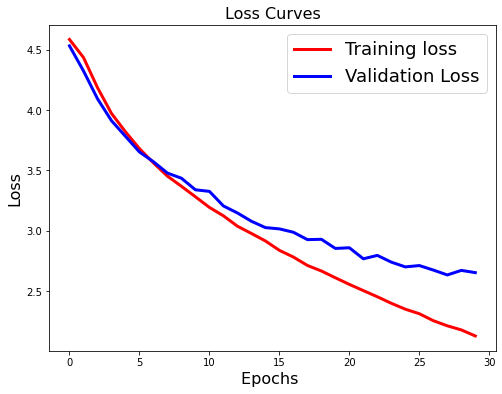

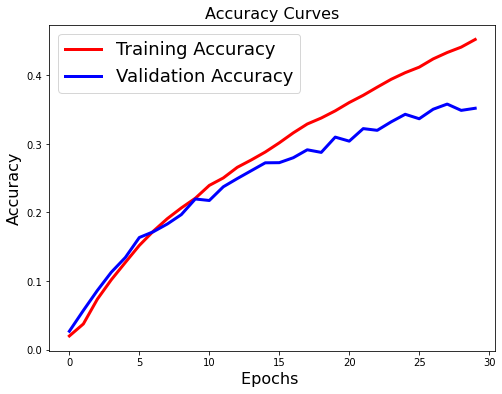

In [ ]:
plot_history(history)

# CNN with BN i Dropout


In [ ]:
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 8s 10ms/step - loss: 2.5057 - accuracy: 0.2460 - val_loss: 1.4708 - val_accuracy: 0.4585
Epoch 2/30
782/782 [==============================] - 7s 9ms/step - loss: 1.5730 - accuracy: 0.4268 - val_loss: 1.3185 - val_accuracy: 0.5262
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 1.4065 - accuracy: 0.4869 - val_loss: 1.2414 - val_accuracy: 0.5469
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 1.3120 - accuracy: 0.5250 - val_loss: 1.2122 - val_accuracy: 0.5545
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 1.2295 - accuracy: 0.5557 - val_loss: 1.0897 - val_accuracy: 0.6037
Epoch 6/30
782/782 [==============================] - 7s 9ms/step - loss: 1.1716 - accuracy: 0.5758 - val_loss: 1.0398 - val_accuracy: 0.6314
Epoch 7/30
782/782 [==============================] - 7s 9ms/step - loss: 1.1231 - accuracy: 0.5994 - val_loss: 1.2167 - val_accuracy: 0.5595
Epoch

In [ ]:
plot_history(history)

# MobileNet

Unfortunately, MobileNet is not designed for such small images. 

In [ ]:
from keras.models import Model
from keras applications import MobileNetV2

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

model = MobileNetV2(input_shape=(train_x.shape[1], train_x.shape[2], 3),
                    classes=10, include_top=False, weights=None)

x=model.layers[-1].output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
flatten=Flatten()(x)
predictions=Dense(10, activation='softmax')(flatten)
model = Model(inputs=model.input, outputs=predictions)  

# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, 
                    validation_data=(test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 17s 18ms/step - loss: 2.2752 - accuracy: 0.2208 - val_loss: 2.3622 - val_accuracy: 0.1000
Epoch 2/30
782/782 [==============================] - 13s 17ms/step - loss: 1.6899 - accuracy: 0.3829 - val_loss: 2.3676 - val_accuracy: 0.1000
Epoch 3/30
782/782 [==============================] - 13s 17ms/step - loss: 1.5098 - accuracy: 0.4524 - val_loss: 2.3527 - val_accuracy: 0.1000
Epoch 4/30
782/782 [==============================] - 13s 17ms/step - loss: 1.4163 - accuracy: 0.4852 - val_loss: 2.3781 - val_accuracy: 0.1000
Epoch 5/30
782/782 [==============================] - 13s 17ms/step - loss: 1.3491 - accuracy: 0.5130 - val_loss: 2.3997 - val_accuracy: 0.1000
Epoch 6/30
782/782 [==============================] - 13s 17ms/step - loss: 1.2836 - accuracy: 0.5383 - val_loss: 2.4028 - val_accuracy: 0.1000
Epoch 7/30
782/782 [==============================] - 13s 17ms/step - loss: 1.2272 - accuracy: 0.5608 - val_loss: 2.1906 - val_accuracy:

# Standalone session

Create your own convolutional network to classify images from the CIFAR100 collection

https://www.cs.toronto.edu/~kriz/cifar.html

Remember to add GPU in the settings of the execution environment
Share the result on slack, may the best one win! ;)

To explore:


* The optimal number of layers, how do DropOut and BatchNormalization layers affect the performance?
* Types of filters.
* Hyperparameters for network learning.
* Optimal number of epochs.
* Choice of optimizer.
* How to initialize the weights.


> I recommend not to look for ready-made solutions ;)

Below are some hints:


# Tips

1. Downloading the database

In [ ]:
import keras

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


2. Image processing

In [ ]:
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

3. Checking the content of the data

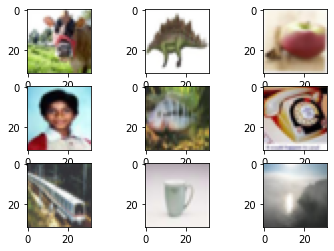

(50000, 32, 32, 3)


In [ ]:
import matplotlib.pyplot as plt

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

print(train_x.shape)

4. Simple Convolutions


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=50, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/50
196/196 [==============================] - 12s 24ms/step - loss: 4.6215 - accuracy: 0.0127 - val_loss: 4.5592 - val_accuracy: 0.0249
Epoch 2/50
196/196 [==============================] - 4s 21ms/step - loss: 4.5295 - accuracy: 0.0324 - val_loss: 4.3824 - val_accuracy: 0.0523
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 4.3050 - accuracy: 0.0613 - val_loss: 4.1074 - val_accuracy: 0.0814
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 4.0329 - accuracy: 0.0979 - val_loss: 3.9263 - val_accuracy: 0.1122
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 3.8316 - accuracy: 0.1270 - val_loss: 3.7702 - val_accuracy: 0.1330
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 3.6915 - accuracy: 0.1482 - val_loss: 3.6655 - val_accuracy: 0.1513
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 3.5977 - accuracy: 0.1675 - val_loss: 3.5540 - val_accuracy: 0.174

In [ ]:
plot_history(history)

NameError: ignored

Benchmark link

https://paperswithcode.com/sota/image-classification-on-cifar-100